In [122]:
#importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import plotly as py
import plotly.graph_objs as go
import ipywidgets as widgets
import datetime
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.figure_factory as ff
py.offline.init_notebook_mode(connected=True)
from math import floor
from plotly import tools
from plotly.graph_objs import *
from IPython.display import display

In [123]:
#preparing the dataset with name mov
columns_name = ['dow','director','genre','movie_title','studio','adj_gross','budget','gross','IMDB_rating','movie_lens_rating','overseas','profit','profit_perc','runtime','US','gross_US']
mov = pd.read_csv("MovieRelease.csv",encoding = 'latin1')
mov = pd.DataFrame(mov)
mov.shape

(608, 17)

In [124]:
#renaming the columns for convenience for  using in the code during implementation
old = mov.columns
mov = mov.rename(columns={'Day of Week': 'dow','Movie Title':'Movie_Title'})  
mov = mov.rename(columns={'Adjusted Gross ($mill)':'adj_gross','Budget ($mill)':'budget','Gross ($mill)':'gross'})
mov = mov.rename(columns={'IMDb Rating':'IMDB_Rating','MovieLens Rating':'MovieLens_Rating','Overseas ($mill)':'Overseas'})
mov = mov.rename(columns={'Overseas%':'Overseas_percent','Profit ($mill)':'Profit','Profit%':'Profit_percent','Runtime (min)':'Runtime'})
mov = mov.rename(columns={'US ($mill)':'US_mill','Gross % US':'Gross_US'})
mov.columns
old

Index(['Day of Week', 'Director', 'Genre', 'Movie Title', 'Studio',
       'Adjusted Gross ($mill)', 'Budget ($mill)', 'Gross ($mill)',
       'IMDb Rating', 'MovieLens Rating', 'Overseas ($mill)', 'Overseas%',
       'Profit ($mill)', 'Profit%', 'Runtime (min)', 'US ($mill)',
       'Gross % US'],
      dtype='object')

In [125]:
#viewing the columns datatype using info method
mov.columns
mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 17 columns):
dow                 608 non-null object
Director            608 non-null object
Genre               608 non-null object
Movie_Title         608 non-null object
Studio              608 non-null object
adj_gross           608 non-null object
budget              608 non-null float64
gross               608 non-null object
IMDB_Rating         608 non-null float64
MovieLens_Rating    608 non-null float64
Overseas            608 non-null object
Overseas_percent    608 non-null float64
Profit              608 non-null object
Profit_percent      608 non-null float64
Runtime             608 non-null int64
US_mill             608 non-null float64
Gross_US            608 non-null float64
dtypes: float64(7), int64(1), object(9)
memory usage: 80.9+ KB


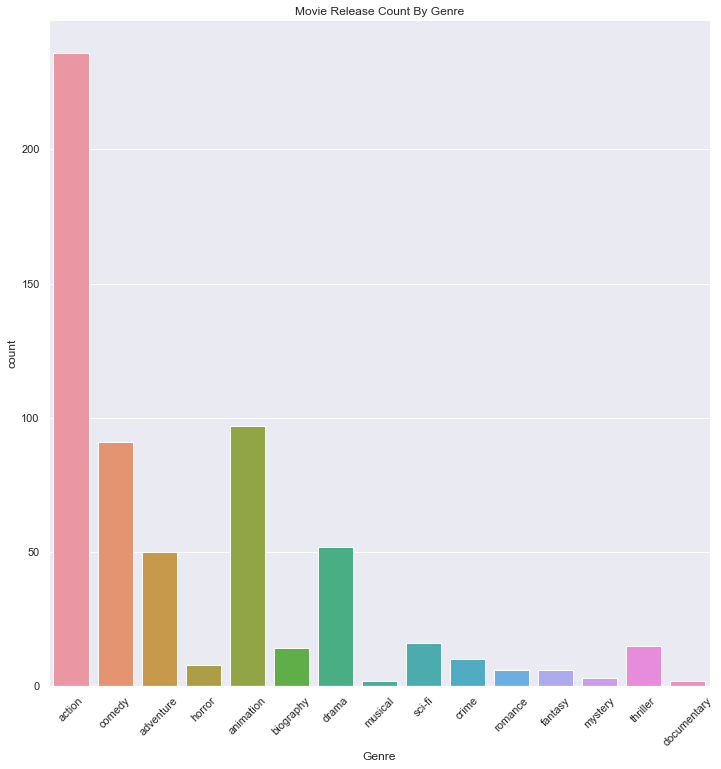

In [126]:
vis1 = sns.factorplot(data = mov, x = 'Genre', kind = 'count',size = 10);#using snsfactorplot for visualsing the count by genre
plt.title("Movie Release Count By Genre");#setting the title using plt.title method
plt.xticks(rotation = (45));#rotating the xticks by 45 visualising the ticks on the x -axis 

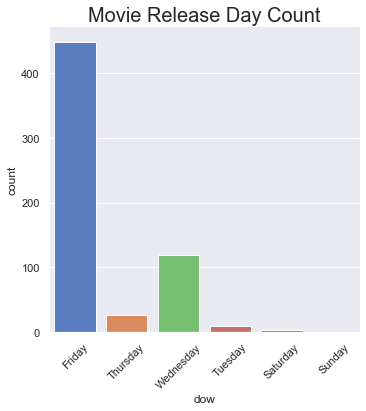

In [127]:
vis2 = sns.factorplot(data = mov, x = 'dow', kind = 'count',size =5);#using factorplot from sns for counting the releases
plt.title("Movie Release Day Count",fontsize=20);#setting the title to plot
plt.xticks(rotation = (45));#rotating the x axis ticks by 45 degrees

In [128]:
studio_unique = mov.Studio.unique()#getting the unique studios from studio column

In [129]:
len(studio_unique)#counting the number of unique studios using len

36

In [130]:
len(mov.Genre.unique())#counting the unique genres 

15

In [131]:
genre_filters = ['action','adventure','animation','comedy','drama'] #considering only the above genre
mov2 = mov[mov.Genre.isin(genre_filters)]#filtering only specific genre from list of all genres

In [132]:
mov2.Genre.unique() #getting the unique genres

array(['action', 'comedy', 'adventure', 'animation', 'drama'],
      dtype=object)

In [133]:
studio_filters = ['Buena Vista Studios','Fox','Paramount Pictures','Sony','Universal','WB']#considering only the above genre
mov3 = mov2[mov2.Studio.isin(studio_filters)]#subsetting the dataframe as mov3

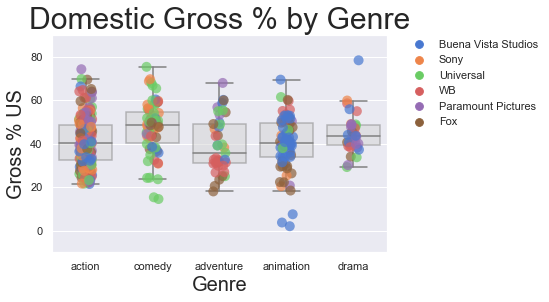

In [134]:
# Define the style
sns.set(style="darkgrid", color_codes=True)


# Plot the boxsplots
ax = sns.boxplot(data=mov3, x='Genre', y='Gross_US', orient='v', color='lightgray', showfliers=False)
plt.setp(ax.artists, alpha=0.5)


# Add in points to show each observation
plt.rcParams['figure.figsize'] = 15,10
sns.set_palette('muted')
sns.stripplot(x='Genre', y='Gross_US', data=mov3, jitter=True, size=10, linewidth=0, hue = 'Studio', alpha=0.7)

ax.axes.set_title('Domestic Gross % by Genre',fontsize=30)
ax.set_xlabel('Genre',fontsize=20)
ax.set_ylabel('Gross % US',fontsize=20)
ax.set(ylim=(-10,90))

# Define where to place the legend
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False)
plt.show()

In [135]:
profit_by_dow = mov.groupby(["dow"]).Profit_percent.mean().reset_index()#grouping by the day of week(dow) and taking mean
profit_by_dow #showing the result

,dow,Profit_percent
0,Friday,608.935937
1,Saturday,172.666667
2,Sunday,261.000000
3,Thursday,409.348148
4,Tuesday,379.320000
5,Wednesday,1251.206723


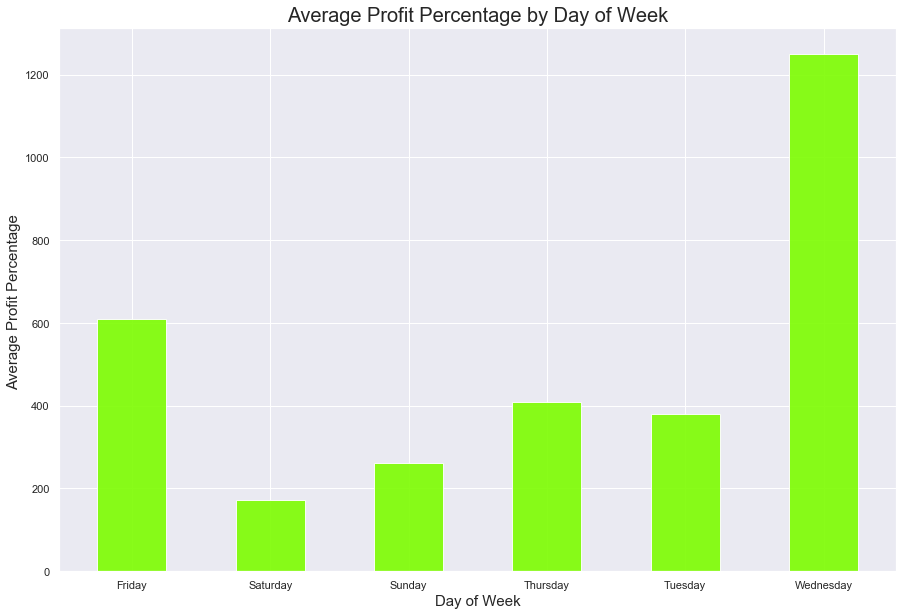

In [136]:
objects = ('Friday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday') # taking list of days 
y_pos = np.arange(len(objects)) #setting tick positions using arange method from numpy library
avg_profit_dow = profit_by_dow["Profit_percent"] 

plt.bar(y_pos, avg_profit_dow, align='center',width = 0.5,alpha=0.90,color='lawngreen')#using plt.bar for visualising
plt.xticks(y_pos, objects)#setting xticks with their labels
plt.xlabel('Day of Week',fontsize=15) #x axis label
plt.ylabel('Average Profit Percentage ',fontsize=15) #y-axis label
plt.title('Average Profit Percentage by Day of Week',fontsize=20) #setting the title

plt.show()# displaying the plot


In [137]:

mov3 = mov[mov.Runtime > 20] #choosing movies with runtime greater than 20 minutes
mov3


,dow,Director,Genre,Movie_Title,Studio,adj_gross,budget,gross,IMDB_Rating,MovieLens_Rating,Overseas,Overseas_percent,Profit,Profit_percent,Runtime,US_mill,Gross_US
0,Friday,Brad Bird,action,Tomorrowland,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,action,The Expendables 3,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,Wednesday,William Friedkin,horror,The Exorcist,WB,"2,363.60",12.0,441.3,6.9,3.39,208.4,47.2,429.3,3577.5,122,232.9,52.8
604,Wednesday,George Lucas,action,Star Wars,Fox,"3,042.80",11.0,775.4,8.7,4.19,314.4,40.5,764.4,6949.1,121,461.0,59.5
605,Friday,James Cameron,sci-fi,Avatar,Fox,"3,090.40",237.0,"2,788",7.9,3.78,"2,027.50",72.7,"2,551",1076.4,162,760.5,27.3
606,Wednesday,James Cameron,drama,Titanic,Paramount Pictures,"3,240.10",200.0,"2,186.80",7.7,3.38,"1,528.10",69.9,"1,986.80",993.4,194,658.7,30.1


In [138]:
#visualising the plot 
layout = go.Layout(
    title='Budget vs. Runtime their IMDB Ratings',
    xaxis=dict(
        title='Runtime(min)',
        gridcolor='rgb(255, 255, 255)',
        range=[0,250],
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    yaxis=dict(
        title='Budget(in millions)',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    )
)
data = [go.Scatter(
    x=mov3.Runtime.values, # Runtime
    y=mov3.budget.values,  # budget
    mode='markers',
    text= mov3.Movie_Title.values, # Movie Titles
    marker=dict(
        size=3*(mov3.IMDB_Rating),
        sizeref=1.0,
        color=mov3.IMDB_Rating.values,
        colorbar=ColorBar(title='IMDB  Rating<br> &nbsp;'),
        showscale=True,
        colorscale='Rainbow'
    ))]
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [139]:
mov["profit"] = abs(mov["Gross_US"] - mov["budget"]) #taking profit by subracting Gross amount from budget
mov["profit"] 
director_df = mov.groupby('Director', as_index=False) #grouping by director name
director_df = director_df.mean() 
name_counts = mov['Director'].value_counts().to_dict() # dictionary of director and number of rows/movies per
director_df['film_count'] = director_df['Director'].map(name_counts) # match the film count to the director
director_df.sort_values('profit', ascending=False, inplace=True)
dir_subset = director_df[director_df['film_count'] > 5] #director films greater than 5
dir_subset.head(3)




,Director,budget,IMDB_Rating,MovieLens_Rating,Overseas_percent,Profit_percent,Runtime,US_mill,Gross_US,profit,film_count
249,Peter Jackson,179.142857,8.171429,3.811429,67.157143,530.700000,174.142857,295.785714,32.842857,146.300000,7
116,Gore Verbinski,176.333333,7.233333,3.450000,57.516667,255.933333,139.000000,230.000000,42.483333,135.116667,6
40,Bryan Singer,169.500000,7.333333,3.581667,54.800000,150.900000,133.666667,172.616667,45.200000,124.300000,6


In [140]:
top5_dir_df = dir_subset[['Director', 'profit']]  #subsetting only taking director and profit

In [141]:
top5_dir_df = top5_dir_df.iloc[0:5] #taking only top 5 directors

In [142]:
top5_dir_df

,Director,profit
249,Peter Jackson,146.300000
116,Gore Verbinski,135.116667
40,Bryan Singer,124.300000
210,Michael Bay,118.062500
286,Roland Emmerich,91.383333


In [143]:
director_list = top5_dir_df['Director'] # director list
profit_list = top5_dir_df['profit'] # [profit list]

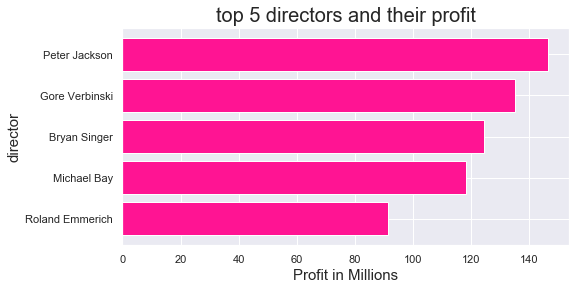

In [144]:
#making the visualisations suing horizonatl bar
fig, ax = plt.subplots()
director = director_list
y_pos = np.arange(len(director))
performance = profit_list
ax.barh(y_pos, performance,color='deeppink')
ax.set_yticks(y_pos)
ax.set_yticklabels(director)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Profit in Millions',fontsize=15)
ax.set_ylabel('director',fontsize=15)
ax.set_title('top 5 directors and their profit',fontsize=20)
fig.set_size_inches(8, 4)

plt.show()

In [145]:
mov.head(2).transpose()#transposing the data 

,0,1
dow,Friday,Friday
Director,Brad Bird,Scott Waugh
Genre,action,action
Movie_Title,Tomorrowland,Need for Speed
Studio,Buena Vista Studios,Buena Vista Studios
adj_gross,202.1,204.2
budget,170,66
gross,202.1,203.3
IMDB_Rating,6.7,6.6
MovieLens_Rating,3.26,2.97


In [146]:
df_overseas = mov[['Movie_Title','Overseas_percent']] #subsetting the data set mov

In [147]:
df_overseas.head(2) #seeing only head content

,Movie_Title,Overseas_percent
0,Tomorrowland,55.4
1,Need for Speed,78.6


In [148]:
df_overseas.info() #see the info of columns in the data set with their data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 2 columns):
Movie_Title         608 non-null object
Overseas_percent    608 non-null float64
dtypes: float64(1), object(1)
memory usage: 9.6+ KB


In [149]:
df_overseas.sort_values(by='Overseas_percent' , ascending=True, inplace=True) #sorting the dataset ascending order

In [150]:
top_poor_overseas = df_overseas.iloc[0:10] #taking only initial  10 values 

In [151]:
top_poor_overseas #viewing th result

,Movie_Title,Overseas_percent
192,The Blind Side,17.2
474,Ghostbusters,18.0
105,Elf,21.3
23,The Help,21.7
359,How the Grinch Stole Christmas,24.7
496,Beverly Hills Cop,25.8
197,Wedding Crashers,26.6
269,Austin Powers in Goldmember,28.1
97,The Fast and the Furious,30.3
181,Big Daddy,30.4


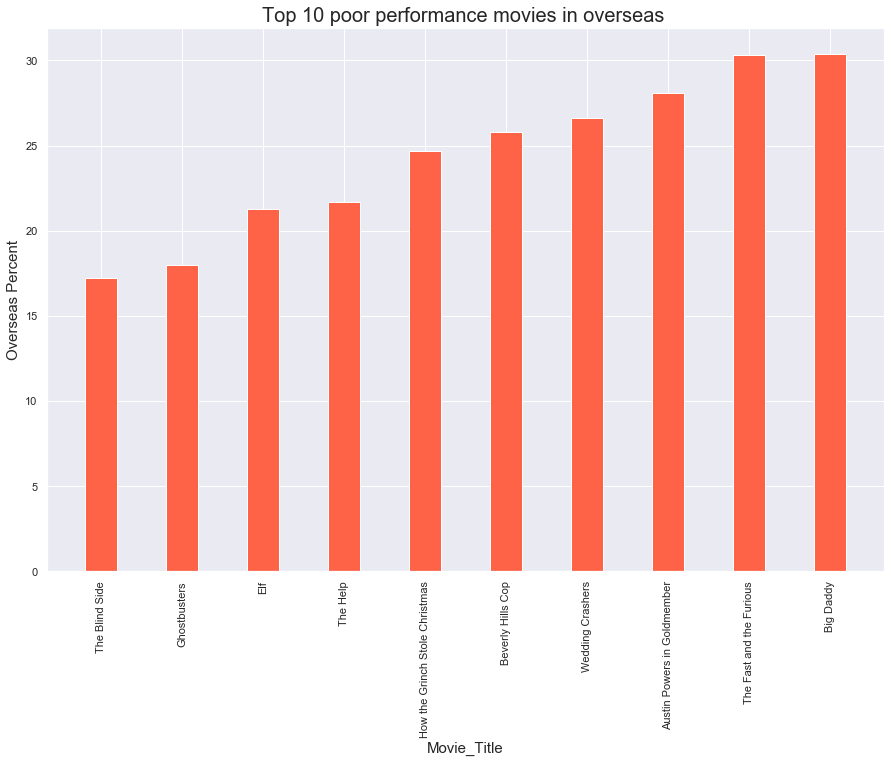

In [152]:
movie_name = top_poor_overseas['Movie_Title'] #taking the movie title in to a variable
overseas_profit = top_poor_overseas['Overseas_percent']
plt.bar(movie_name, overseas_profit,width=0.4,color='tomato'); #visulasing using bar chart
plt.xticks(rotation=90);
plt.xlabel('Movie_Title',fontsize=15);
plt.ylabel("Overseas Percent",fontsize=15)
plt.title("Top 10 poor performance movies in overseas ",fontsize=20);

In [153]:
df_overseas_high = mov[['Movie_Title','Overseas_percent']] #subset of the data set

In [154]:
df_overseas_high.sort_values(by='Overseas_percent' , ascending=False, inplace=True) #sorting values using sort_values method

In [155]:
top_high_overseas = df_overseas_high.iloc[0:10] #taking only initial ten values

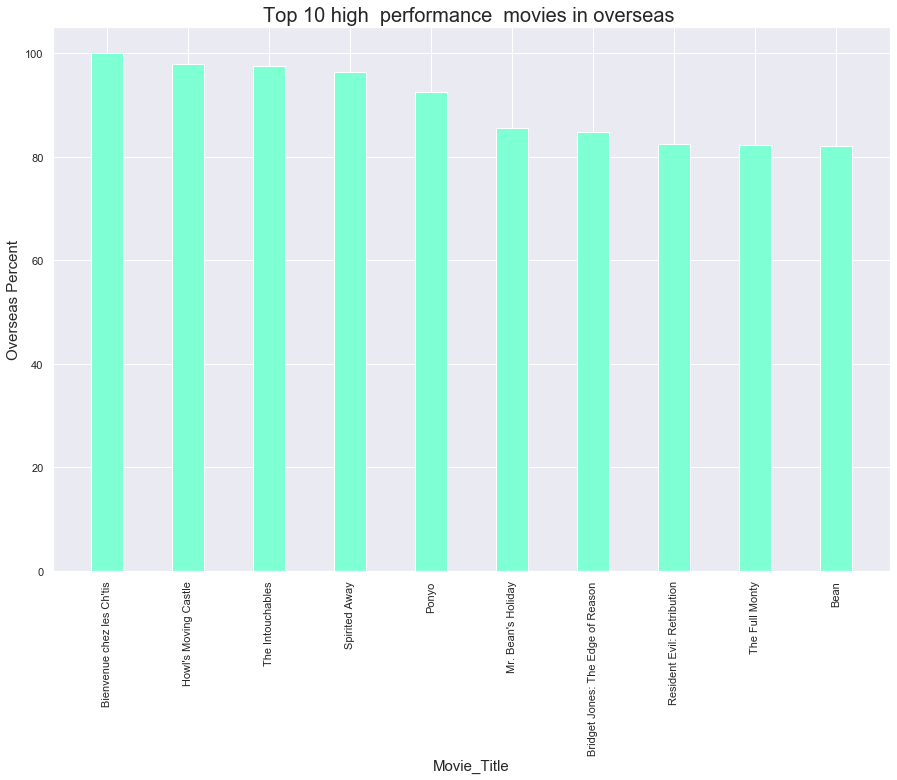

In [156]:
movie_name = top_high_overseas['Movie_Title'] #taking movie title in to a list
overseas_profit = top_high_overseas['Overseas_percent']
plt.bar(movie_name, overseas_profit,width=0.4,color='aquamarine'); #using plt bar making visualisation
plt.xticks(rotation=90); #rotation by 90  
#labelling the axis
plt.xlabel('Movie_Title',fontsize=15);
plt.ylabel("Overseas Percent",fontsize=15)
plt.title("Top 10 high  performance  movies in overseas ",fontsize=20);

In [157]:
mov.columns #viewing the columns using .columns method

Index(['dow', 'Director', 'Genre', 'Movie_Title', 'Studio', 'adj_gross',
       'budget', 'gross', 'IMDB_Rating', 'MovieLens_Rating', 'Overseas',
       'Overseas_percent', 'Profit', 'Profit_percent', 'Runtime', 'US_mill',
       'Gross_US', 'profit'],
      dtype='object')

In [158]:
ratings_df = mov[['Genre','MovieLens_Rating','IMDB_Rating']] #subsetting the dataframe

In [159]:
avg_movielens_rating = ratings_df.groupby('Genre')['MovieLens_Rating'].mean() #grouping by genre and taking average
avg_imdb_rating = ratings_df.groupby('Genre')['IMDB_Rating'].mean()


In [160]:
len(avg_movielens_rating) #using len method to get the length of list

15

In [161]:
len(avg_imdb_rating) #counting length of avg_imdb_rating


15

In [162]:
avg_imdb_rating

Genre
action         6.790678
adventure      7.072000
animation      6.976289
biography      7.800000
comedy         6.585714
crime          7.800000
documentary    7.550000
drama          7.192308
fantasy        7.550000
horror         6.550000
musical        7.000000
mystery        6.766667
romance        6.883333
sci-fi         7.443750
thriller       7.253333
Name: IMDB_Rating, dtype: float64

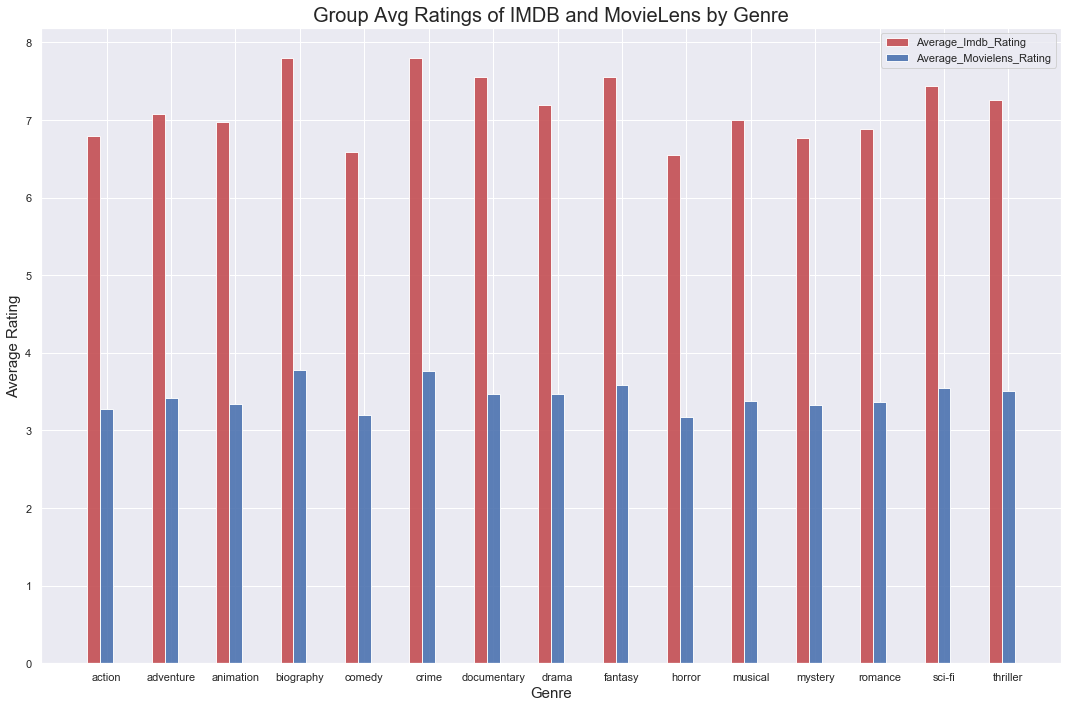

In [163]:
import matplotlib.pyplot as plt
# data to plot
n_groups = len(avg_imdb_rating) #as there are 10 genres to show in the graph
means_Q1 = ((avg_imdb_rating['action']     
,avg_imdb_rating['adventure']     
,avg_imdb_rating['animation']     
,avg_imdb_rating['biography']  
,avg_imdb_rating['comedy']        
,avg_imdb_rating['crime']        
,avg_imdb_rating['documentary']  
,avg_imdb_rating['drama']         
,avg_imdb_rating['fantasy']       
,avg_imdb_rating['horror']         
,avg_imdb_rating['musical']       
,avg_imdb_rating['mystery']       
,avg_imdb_rating['romance']        
,avg_imdb_rating['sci-fi']        
,avg_imdb_rating['thriller']))#all the movielens values 
means_Q2 = (avg_movielens_rating['action']     
,avg_movielens_rating['adventure']     
,avg_movielens_rating['animation']     
,avg_movielens_rating['biography']  
,avg_movielens_rating['comedy']        
,avg_movielens_rating['crime']        
,avg_movielens_rating['documentary']  
,avg_movielens_rating['drama']         
,avg_movielens_rating['fantasy']       
,avg_movielens_rating['horror']         
,avg_movielens_rating['musical']       
,avg_movielens_rating['mystery']       
,avg_movielens_rating['romance']        
,avg_movielens_rating['sci-fi']        
,avg_movielens_rating['thriller'])
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)#set the x label range values
bar_width = 0.20 #width of the bar in the bar graph
opacity = 0.90 #the thickness of the color shown inside each bar 

#each rectangle depicts all quarter(Q1,Q2,Q3,Q4) values in the bar plot
rects1 = plt.bar(index, means_Q1, bar_width,
alpha=opacity,
color='r',
label='Average_Imdb_Rating')

rects2 = plt.bar(index + bar_width, means_Q2, bar_width,
alpha=opacity,
color='b',
label='Average_Movielens_Rating')

plt.xlabel('Genre',fontsize=15)#set the x axis label
plt.ylabel('Average Rating',fontsize=15)#setting the y-axis label
plt.title('Group Avg Ratings of IMDB and MovieLens by Genre',fontsize=20)#setting the title for the plot
plt.xticks(index + bar_width,('action','adventure','animation','biography','comedy','crime','documentary','drama','fantasy','horror','musical','mystery','romance' ,'sci-fi','thriller'))#lables on the x axis
plt.legend()

plt.tight_layout()#tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area.
plt.show()#displaying the plot

In [164]:
df_budget_profit = mov[['budget','Profit_percent']] #subsetting the data set

In [165]:
mov.columns

Index(['dow', 'Director', 'Genre', 'Movie_Title', 'Studio', 'adj_gross',
       'budget', 'gross', 'IMDB_Rating', 'MovieLens_Rating', 'Overseas',
       'Overseas_percent', 'Profit', 'Profit_percent', 'Runtime', 'US_mill',
       'Gross_US', 'profit'],
      dtype='object')

In [166]:
df_budget_profit = mov[['Movie_Title','budget','Profit_percent']] #required subset of whole data frame

In [167]:
df_budget_profit.head(2)

,Movie_Title,budget,Profit_percent
0,Tomorrowland,170.0,18.9
1,Need for Speed,66.0,208.0


In [168]:
df_budget_profit.info() #taking the info mehod to view results

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 3 columns):
Movie_Title       608 non-null object
budget            608 non-null float64
Profit_percent    608 non-null float64
dtypes: float64(2), object(1)
memory usage: 14.4+ KB


In [169]:
df_budget_profit.sort_values(by='Profit_percent' , ascending=False, inplace=True) #sorting the values 

In [170]:
df_budget_profit.head()
budget_vs_income = df_budget_profit.iloc[0:20] #taking initial values

In [171]:
budget_vs_income
#converting the millions in to thousands
for idx, row in budget_vs_income.iterrows():
    budget_vs_income.loc[idx, 'budget'] *= 1000
budget_vs_income

,Movie_Title,budget,Profit_percent
209,The Blair Witch Project,600.0,41333.3
607,Gone with the Wind,3900.0,10161.5
600,E.T.: The Extra-Terrestrial,10500.0,7451.4
366,My Big Fat Greek Wedding,5000.0,7274.0
256,The Full Monty,3500.0,7268.6
604,Star Wars,11000.0,6949.1
547,Saturday Night Fever,3500.0,6674.3
591,Grease,6000.0,6483.3
489,Crocodile Dundee,5000.0,6464.0
271,Four Weddings and a Funeral,4500.0,5360.0


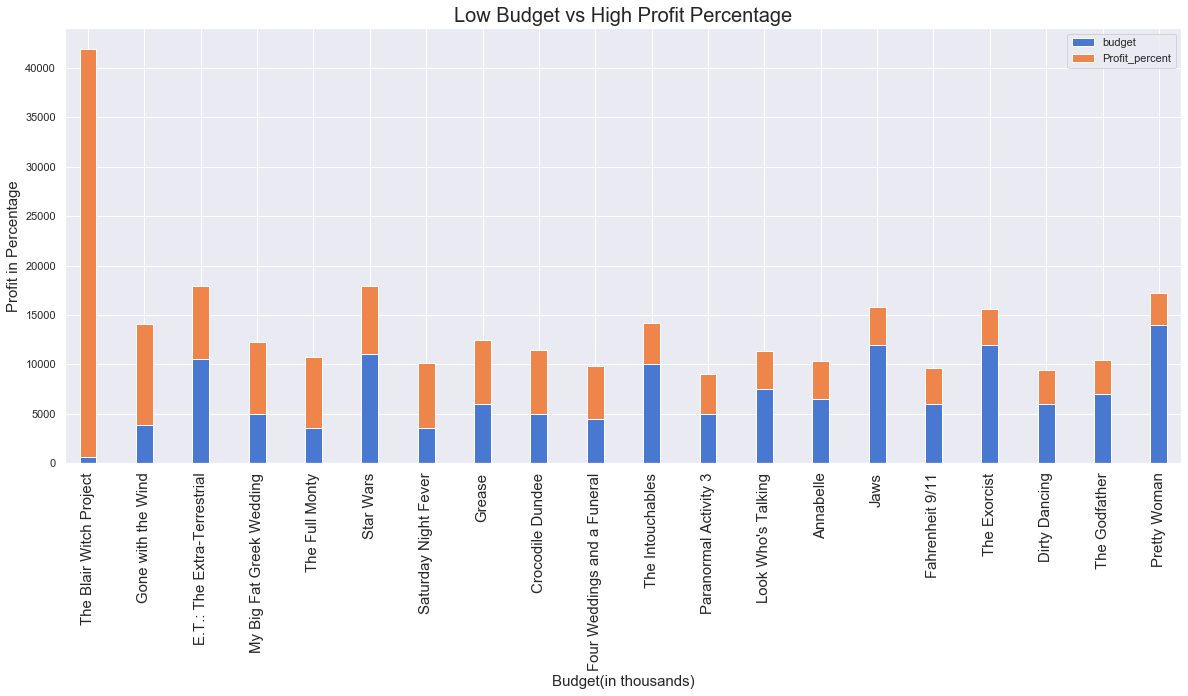

In [172]:
#making a stacked histogram
ax = budget_vs_income.plot(kind='bar',stacked='True',width = 0.30 ,figsize =(20,8));
#labelling axises
ax.set_xlabel("Budget(in thousands)",fontsize=15);
ax.set_ylabel("Profit in Percentage",fontsize=15);
#setting the title 
ax.set_title("Low Budget vs High Profit Percentage",fontsize=20);
#rotation axis labels
ax.set_xticklabels(budget_vs_income['Movie_Title'],rotation=90,fontsize=15);

# References
https://thispointer.com/pandas-sort-rows-or-columns-in-dataframe-based-on-values-using-dataframe-sort_values/

https://matplotlib.org/gallery/lines_bars_and_markers/categorical_variables.html#sphx-glr-gallery-lines-bars-and-markers-categorical-variables-py

https://matplotlib.org/gallery/misc/findobj_demo.html#sphx-glr-gallery-misc-findobj-demo-py

https://kite.com/python/answers/how-to-rotate-axis-labels-in-matplotlib-in-python

https://www.ijrte.org/wp-content/uploads/papers/v7i4s/E2008017519.pdf

https://plotly.com/python/

https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/bar_stacked.html

https://blog.bioturing.com/2018/05/22/how-to-compare-box-plots/

dummies.com/education/math/statistics/comparing-two-box-plots/

